In [147]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

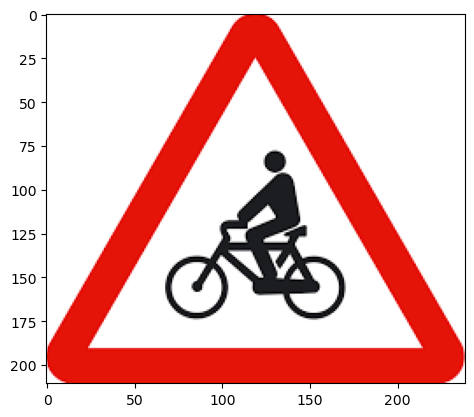

In [158]:
img = cv.imread('../script/images/circulo_st30.jpg',cv.IMREAD_COLOR)
img = cv.imread('../script/images/circulo_30.jpg',cv.IMREAD_COLOR)
img = cv.imread('../script/images/triangulo_bici.png',cv.IMREAD_COLOR)
#img = cv.imread('../script/images/circulo_60lejos.jpeg',cv.IMREAD_COLOR)
#img = cv.imread('../script/images/circulo_80lejos.jpg',cv.IMREAD_COLOR)

plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

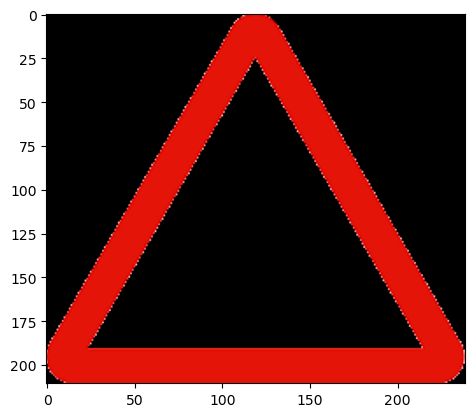

In [167]:
h_inf_1=170
h_sup_1=180
h_inf_2=0
h_sup_2=5

lower_red_1 = np.array([h_inf_1,50,50])
upper_red_1 = np.array([h_sup_1,255,255])
lower_red_2 = np.array([h_inf_2,50,50])
upper_red_2 = np.array([h_sup_2,255,255])

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
red_mask_1 = cv.inRange(hsv, lower_red_1, upper_red_1)
red_mask_2 = cv.inRange(hsv, lower_red_2, upper_red_2)

red_mask = red_mask_1+red_mask_2

img_rojo = cv.bitwise_and(img,img, mask= red_mask)

plt.imshow(cv.cvtColor(img_rojo,cv.COLOR_BGR2RGB))

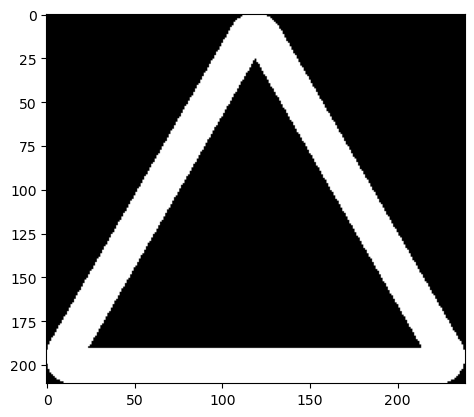

In [168]:
gray = cv.cvtColor(img_rojo, cv.COLOR_BGR2GRAY)
binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY)[1]

plt.imshow(binary ,cmap='gray')

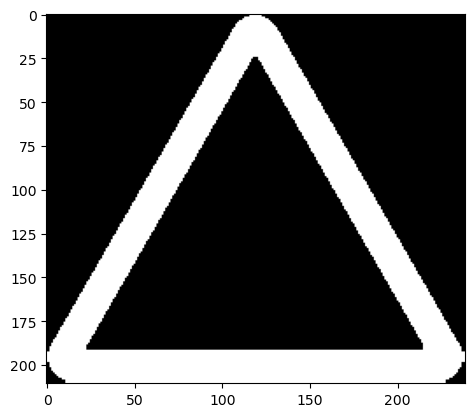

In [169]:
forms = cv.erode(binary, np.ones((3,3),np.uint8), iterations = 1)

plt.imshow(forms ,cmap='gray')

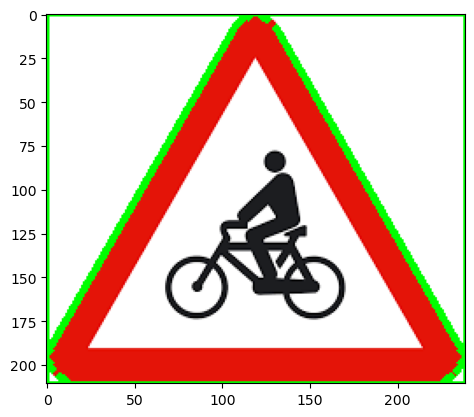

In [170]:
contours = cv.findContours(forms, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
biggest_contour = max(contours[0], key=cv.contourArea)

img_copy = img.copy()
x,y,w,h = cv.boundingRect(biggest_contour)
cv.drawContours(img_copy, biggest_contour, -1, (0,255,0), 3)
cv.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(cv.cvtColor(img_copy,cv.COLOR_BGR2RGB))

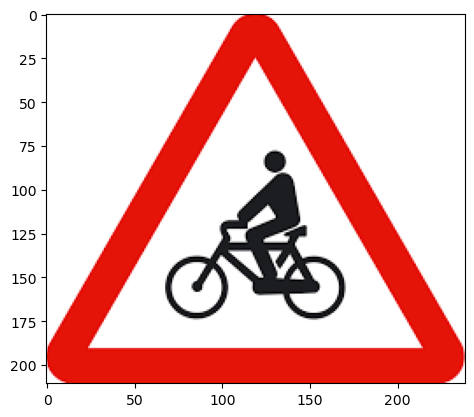

In [171]:
cropped = img[y:y+h, x:x+w]

plt.imshow(cv.cvtColor(cropped,cv.COLOR_BGR2RGB))

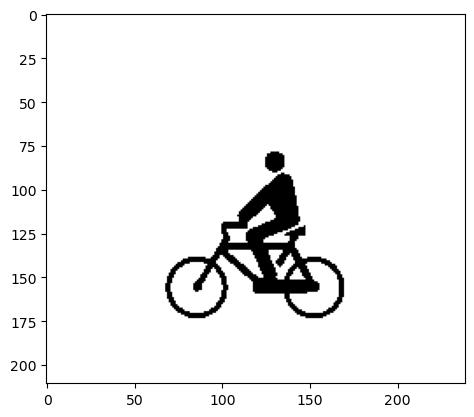

In [172]:
cropped_hls = cv.cvtColor(cropped, cv.COLOR_BGR2HLS)
h,l,s = cv.split(cropped_hls)

bin_cropped = cv.threshold(l, 60, 255, cv.THRESH_BINARY)[1]
#bin_cropped = cv.erode(bin_cropped, np.ones((3,3),np.uint8), iterations = 1)
#bin_cropped = cv.dilate(bin_cropped, np.ones((3,3),np.uint8), iterations = 1)

plt.imshow(bin_cropped, cmap='gray')

0.9498701144182911


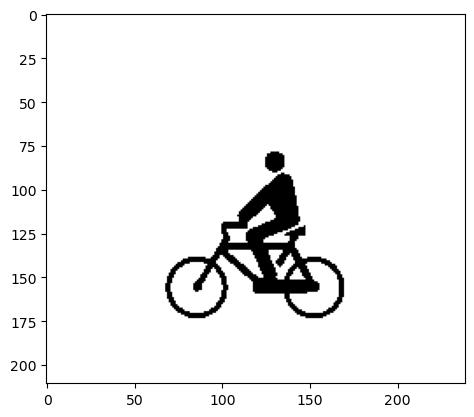

In [173]:
white_pixels = np.sum(bin_cropped == 255)
total_pixels = bin_cropped.shape[0] * bin_cropped.shape[1]

percentage = white_pixels / total_pixels
print(percentage)

if percentage > 0.90:
    pass
elif percentage > 0.85:
    bin_cropped = cv.dilate(bin_cropped, np.ones((3,3),np.uint8), iterations = 1)
elif percentage > 0.80:
    bin_cropped = cv.dilate(bin_cropped, np.ones((3,3),np.uint8), iterations = 3)
elif percentage > 0.75:
    bin_cropped = cv.dilate(bin_cropped, np.ones((3,3),np.uint8), iterations = 5)

plt.imshow(bin_cropped, cmap='gray')

In [174]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

text = pytesseract.image_to_string(bin_cropped, config='--psm 11')
print("La velocidad limite es " + text)

La velocidad limite es 
